In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt 
from collections import Counter 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import matplotlib as mp
import matplotlib.font_manager as fm

# 한국영화진흥위원회

df = pd.read_csv('movielist.csv')

In [2]:
# 그래프에 한글 출력

import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    mp.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    mp.rc('font', family='AppleGothic')
else: #linux
    mp.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
mp.rcParams['axes.unicode_minus'] = False

Windows


In [3]:
df

,순위,영화명,감독,출연배우,개봉일,전국관객수,국적,장르,등급,개봉월
0,1,명량,김한민,"최민식, 류승룡, 조진웅",2014-07-30,"17,613,682",한국,사극,15세이상관람가,7
1,2,극한직업,이병헌,"류승륭, 이하늬, 진선규, 이동휘, 공명",2019-01-23,"16,264,944",한국,코미디,15세이상관람가,1
2,3,신과함께-죄와 벌,김용화,"하정우, 차태현, 주지훈, 김향기, 김동욱, 마동석",2017-12-20,"14,410,754",한국,판타지,12세이상관람가,12
3,4,국제시장,윤제균,"황정민, 김윤진, 오달수, 정진영",2014-12-17,"14,245,998",한국,드라마,12세이상관람가,12
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소","로버트 다우니 주니어, 크리스 에반스, 크리스 헴스워스, 마크 러팔로, 스칼릿 조핸...",2019-04-24,"13,934,592",미국,액션,12세이상관람가,4
...,...,...,...,...,...,...,...,...,...,...
495,496,나의 PS 파트너,변성현,"지성, 김아중",2012-12-06,"1,823,116",한국,멜로/로맨스,청소년관람불가,12
496,497,007 스펙터,샘 멘데스,"다니엘 크레이그, 레아 세이두, 크리스토프 왈츠, 모니카 벨루치, 랄프 파인즈, 데...",2015-11-11,"1,820,842",영국,액션,15세이상관람가,11
497,498,캐치 미 이프 유 캔,스티븐 스필버그,"레오나르도 디카프리오, 톰 행크스",2003-01-24,"1,807,612",미국,드라마,15세이상관람가,1
498,499,변신,김홍선,"배성우, 성동일, 장영남, 김혜준",2019-08-21,"1,804,112",한국,공포(호러),15세이상관람가,8


In [4]:
# 범죄도시2, 기생충 데이터 확인
is_theroundup = df['영화명']=='범죄도시 2'
is_parasite = df['영화명'] == '기생충'

theroundup = df[is_theroundup]
parasite = df[is_parasite]

In [5]:
theroundup

,순위,영화명,감독,출연배우,개봉일,전국관객수,국적,장르,등급,개봉월
11,12,범죄도시 2,이상용,"마동석, 손석구, 최귀화",2022-05-18,"12,693,023",한국,범죄,15세이상관람가,5


In [6]:
parasite

,순위,영화명,감독,출연배우,개봉일,전국관객수,국적,장르,등급,개봉월
24,25,기생충,봉준호,"송강호, 이선균, 조여정, 최우식, 박소담",2019-05-30,"10,313,086",한국,드라마,15세이상관람가,5


In [7]:
# 장르 데이터 확인

df['장르'].value_counts()

액션          147
드라마          85
코미디          54
범죄           38
애니메이션        29
사극           24
SF           22
멜로/로맨스       22
스릴러          19
어드벤처         14
판타지          13
미스터리         12
공포(호러)       11
전쟁            5
뮤지컬           2
서부극(웨스턴)      1
가족            1
다큐멘터리         1
Name: 장르, dtype: int64

<AxesSubplot:>

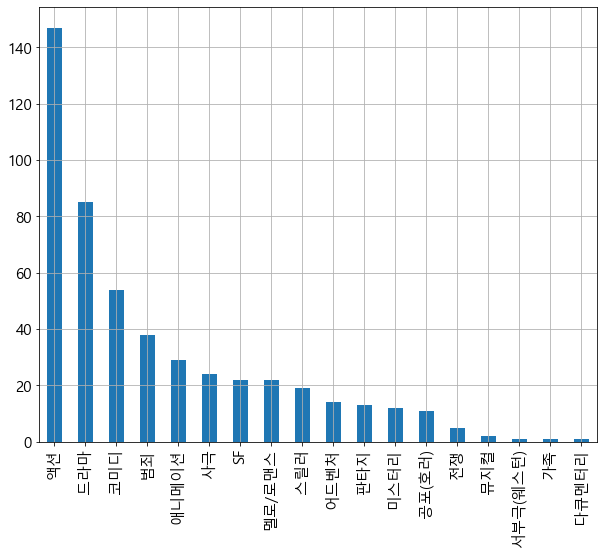

In [8]:
CountGenre = pd.value_counts(df['장르'].values, sort=True)
CountGenre.plot.bar()
CountGenre.plot.bar(grid=True, figsize=(10,8), fontsize=15)

In [9]:
# 연령별 영화 확인

df['등급'].value_counts()

15세이상관람가    201
12세이상관람가    192
청소년관람불가      60
전체관람가        47
Name: 등급, dtype: int64

<AxesSubplot:>

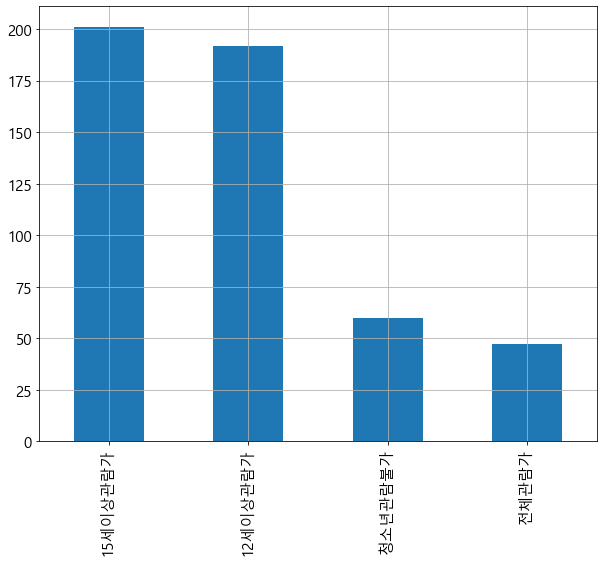

In [10]:
CountAge = pd.value_counts(df['등급'].values, sort=True)
CountAge.plot.bar()
CountAge.plot.bar(grid=True, figsize=(10,8), fontsize=15)

In [11]:
# 개봉월에 따른 흥행영화

df['개봉월'].value_counts()

7     70
12    59
9     48
6     48
8     46
5     46
1     41
10    33
4     29
2     29
11    28
3     23
Name: 개봉월, dtype: int64

<AxesSubplot:>

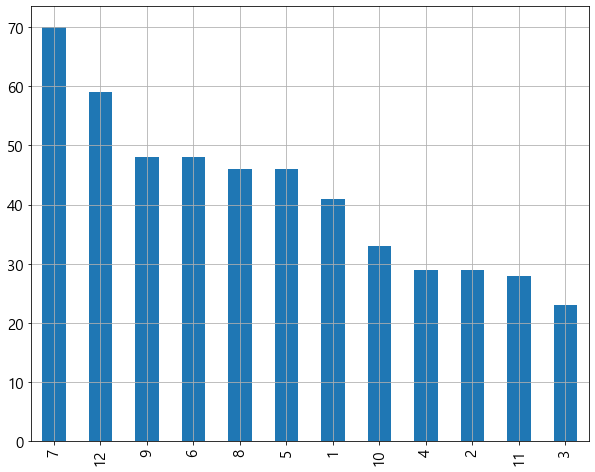

In [12]:
# 그래프랑 같이 뉴스기사 첨부
# https://sports.donga.com/ent/article/all/20220424/113052406/3

CountMonth = pd.value_counts(df['개봉월'].values, sort=True)
CountMonth.plot.bar()
CountMonth.plot.bar(grid=True, figsize=(10,8), fontsize=15)

In [13]:
# 감독에 따른 흥행영화

df['감독'].value_counts()

마이클 베이                    6
크리스토퍼 놀란                  6
강우석                       6
류승완                       6
데이빗 예이츠                   6
                         ..
이원태                       1
캘리 애스버리,앤드류 아담슨,콘래드 베논    1
김호준                       1
이언희                       1
변성현                       1
Name: 감독, Length: 300, dtype: int64

In [14]:
# 기생충감독과 범죄도시2 감독의 다른 흥행작

is_theroundup_director = df['감독'] == '이상용'
is_parasite_director = df['감독'] == '봉준호'

theroundup_director = df[is_theroundup_director]
parasite_director = df[is_parasite_director]

In [15]:
theroundup_director

,순위,영화명,감독,출연배우,개봉일,전국관객수,국적,장르,등급,개봉월
11,12,범죄도시 2,이상용,"마동석, 손석구, 최귀화",2022-05-18,"12,693,023",한국,범죄,15세이상관람가,5


In [16]:
parasite_director

,순위,영화명,감독,출연배우,개봉일,전국관객수,국적,장르,등급,개봉월
7,8,괴물,봉준호,"송강호, 변희봉, 박해일, 배두나, 고아성",2006-07-27,"13,019,740",한국,SF,12세이상관람가,7
24,25,기생충,봉준호,"송강호, 이선균, 조여정, 최우식, 박소담",2019-05-30,"10,313,086",한국,드라마,15세이상관람가,5
32,33,설국열차,봉준호,"크리스 에반스, 송강호, 에드 해리스, 존 허트, 틸다 스윈튼, 제이미 벨",2013-08-01,"8,914,845",한국,SF,15세이상관람가,8
107,108,살인의 추억,봉준호,"송강호, 김상경",2003-04-25,"5,255,376",한국,스릴러,15세이상관람가,4
258,259,마더,봉준호,"김혜자, 원빈",2009-05-28,"3,013,523",한국,드라마,청소년관람불가,5


In [17]:
# 배우 마동석의 다른 흥행작

df[df['출연배우'].str.contains('마동석')]

,순위,영화명,감독,출연배우,개봉일,전국관객수,국적,장르,등급,개봉월
2,3,신과함께-죄와 벌,김용화,"하정우, 차태현, 주지훈, 김향기, 김동욱, 마동석",2017-12-20,"14,410,754",한국,판타지,12세이상관람가,12
11,12,범죄도시 2,이상용,"마동석, 손석구, 최귀화",2022-05-18,"12,693,023",한국,범죄,15세이상관람가,5
15,16,신과함께-인과 연,김용화,"하정우, 주지훈, 김향기, 김동욱, 마동석",2018-08-01,"12,253,247",한국,판타지,12세이상관람가,8
18,19,부산행,연상호,"공유, 정유미, 마동석, 김수안, 김의성, 최우식, 안소희",2016-07-20,"11,565,078",한국,액션,15세이상관람가,7
38,39,백두산,"이해준,김병서","이병헌, 하정우, 마동석, 전혜진, 수지",2019-12-19,"8,252,669",한국,어드벤처,12세이상관람가,12
66,67,범죄도시,강윤성,"마동석, 윤계상",2017-10-03,"6,851,297",한국,범죄,청소년관람불가,10
143,144,나쁜 녀석들: 더 무비,손용호,"마동석, 김상중, 김아중, 장기용",2019-09-11,"4,573,902",한국,범죄,15세이상관람가,9
221,222,악인전,이원태,"마동석, 김무열, 김성규",2019-05-15,"3,364,079",한국,범죄,청소년관람불가,5
225,226,시동,최정열,"마동석, 박정민, 정해인, 염정아, 최성은",2019-12-18,"3,317,038",한국,드라마,15세이상관람가,12
252,253,이터널스,클로이 자오,"안젤리나 졸리, 마동석, 리차드 매든, 쿠마일 난지아니, 셀마 헤이엑, 젬마 찬",2021-11-03,"3,049,688",미국,액션,12세이상관람가,11


In [18]:
# 한국영화/해외영화의 흥행

df['국적'].value_counts()

한국     282
미국     209
일본       2
영국       2
중국       2
프랑스      2
Name: 국적, dtype: int64

<AxesSubplot:>

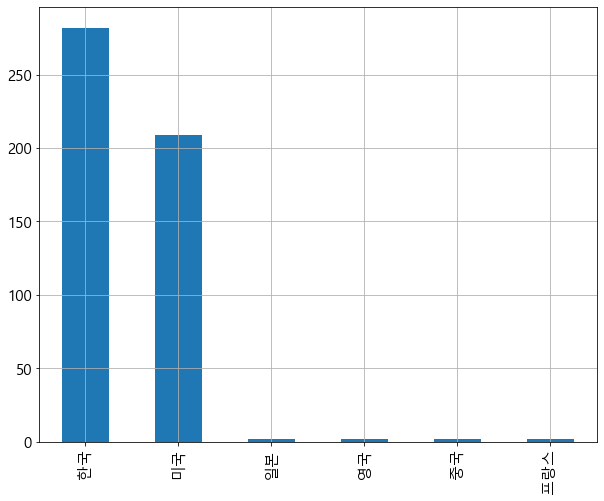

In [19]:
CountCountry = pd.value_counts(df['국적'].values, sort=True)
CountCountry.plot.bar()
CountCountry.plot.bar(grid=True, figsize=(10,8), fontsize=15)